# Another example from the web of using FB Prophet package
Source [url](http://pythondata.com/forecasting-time-series-data-with-prophet-part-1/)
Data corresponds to retail_sales example csv

In [1]:
retail_datafile = '../datasets/example_retail_sales.csv'

In [2]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
sales_df = pd.read_csv(retail_datafile)
sales_df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


### NB: Prophet expects the dataframe to have one column named 'ds' and another named 'y'

It is recommended to transform 'y' in to log('y') before modeling in order to attempt to convert non-stationary data into stationary data. It also converts possible (expoential) trends into linear ones.

In [4]:
sales_df['y_orig'] = sales_df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
sales_df['y'] = np.log(sales_df['y'])
sales_df.tail()

,ds,y,y_orig
288,2016-01-01,12.901537,400928
289,2016-02-01,12.932543,413554
290,2016-03-01,13.039184,460093
291,2016-04-01,13.019078,450935
292,2016-05-01,13.063507,471421


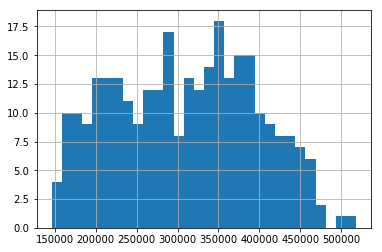

In [5]:
sales_df.y_orig.hist(bins=30)

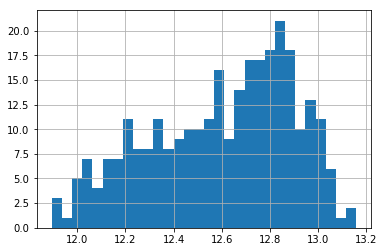

In [6]:
sales_df.y.hist(bins=30)

### Start modeling

In [7]:
model = Prophet()
model.fit(sales_df)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


#### create a future timeseries

In [8]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')

In [9]:
forecast_data = model.predict(future_data)
forecast_data.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
294,2016-06-30,1.006751,13.045199,0.011851,0.011851,13.045199,13.045199,13.035367,13.075560,0.011851,0.011851,0.011851,0.011851,13.057050
295,2016-07-31,1.010240,13.048166,0.032992,0.032992,13.047603,13.048340,13.061203,13.101518,0.032992,0.032992,0.032992,0.032992,13.081158
296,2016-08-31,1.013728,13.051134,-0.036900,-0.036900,13.049268,13.051969,12.992113,13.032657,-0.036900,-0.036900,-0.036900,-0.036900,13.014234
297,2016-09-30,1.017104,13.054005,-0.017310,-0.017310,13.050564,13.056179,13.013428,13.056647,-0.017310,-0.017310,-0.017310,-0.017310,13.036696
298,2016-10-31,1.020592,13.056973,-0.002826,-0.002826,13.051490,13.060853,13.032536,13.075232,-0.002826,-0.002826,-0.002826,-0.002826,13.054147


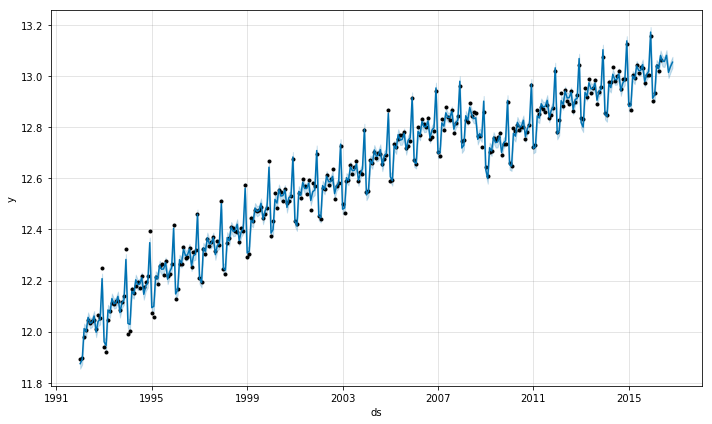

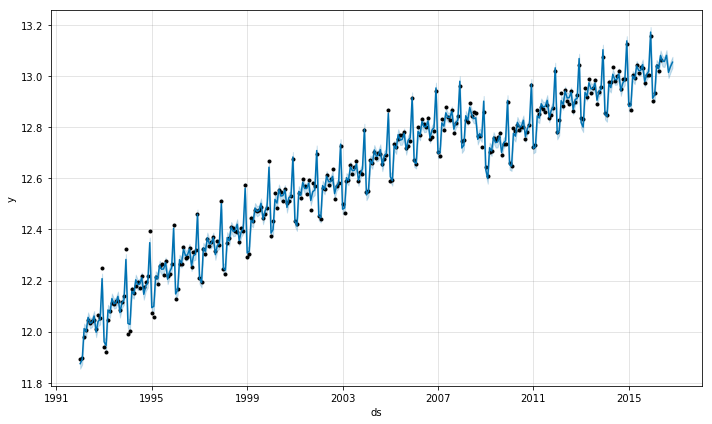

In [13]:
model.plot(forecast_data)

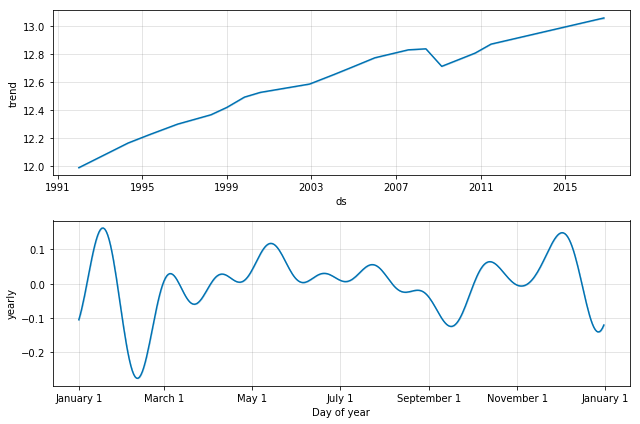

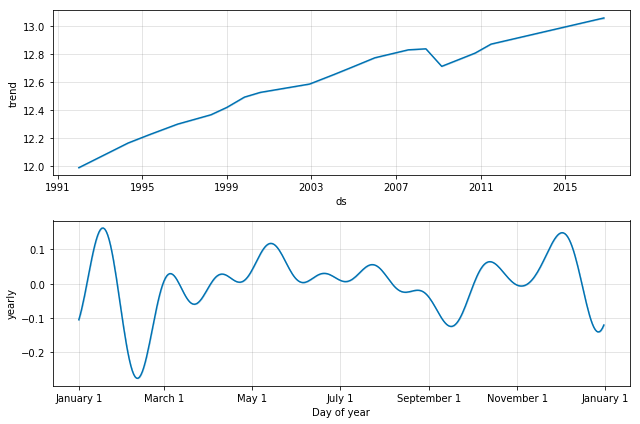

In [14]:
model.plot_components(forecast_data)

From the trend and seasonality, we can see that the trend is a playing a large part in the underlying time series and seasonality comes into play more toward the beginning and the end of the year.

So far so good.  With the above info, we’ve been able to quickly model and forecast some data to get a feel for what might be coming our way in the future from this particular data set.

<hr>

Here is a little tip for getting your forecast plot to display your ‘original’ data so you can see the forecast in ‘context’ and in the original scale rather than the log-transformed data. You can do this by using np.exp() to get our original data back.

In [15]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

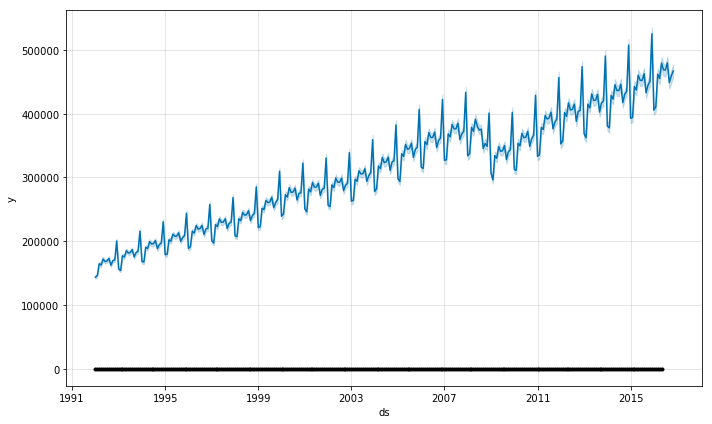

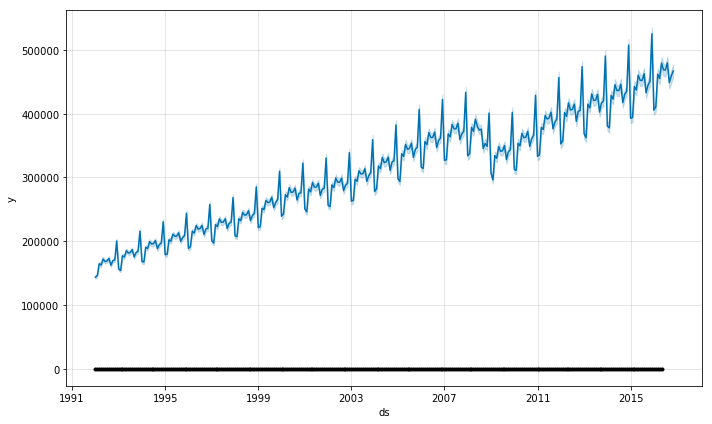

In [16]:
model.plot(forecast_data_orig)

In [17]:
sales_df['y_log']=sales_df['y'] #copy the log-transformed data to another column
sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'

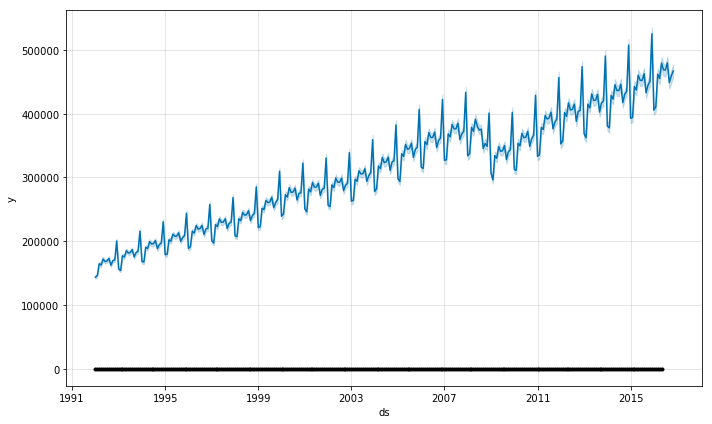

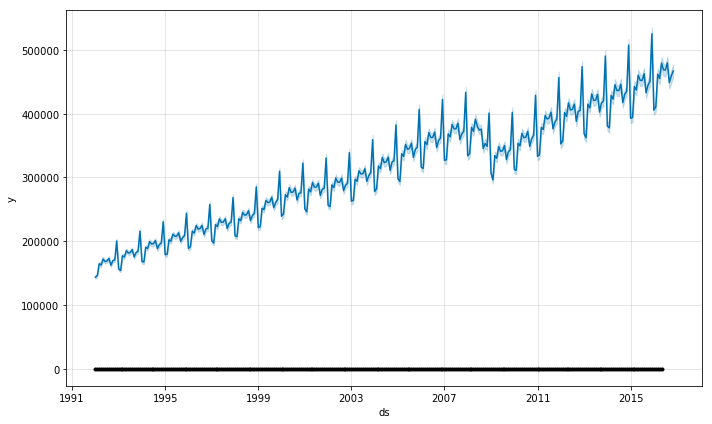

In [18]:
model.plot(forecast_data_orig)